In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
#importing dataset
df=pd.read_csv('C:/Users/procns/Desktop/인공지능/Homework/HW_6/car.data', names = ['buying', 'maint','doors','persons','lug_boot','safety','class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [28]:
#df['doors']=df['doors'].astype(float)
#df['persons']=df['persons'].astype(float)
#df.dtypes

In [45]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['buying'] = label.fit_transform(df['buying'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,vhigh,2,2,small,low,unacc
1,3,vhigh,2,2,small,med,unacc
2,3,vhigh,2,2,small,high,unacc
3,3,vhigh,2,2,med,low,unacc
4,3,vhigh,2,2,med,med,unacc


In [55]:
df['maint'] = label.fit_transform(df['maint'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [57]:
df.corr()

,buying,maint,doors,persons,lug_boot,safety
buying,1.000000e+00,-3.436808e-16,-2.097088e-16,-4.089152e-17,-1.691262e-16,-2.439415e-16
maint,-3.436808e-16,1.000000e+00,-6.466021e-17,-4.272143e-17,-1.549092e-16,-1.404810e-16
doors,-2.097088e-16,-6.466021e-17,1.000000e+00,1.956599e-17,-1.942523e-17,1.062757e-16
persons,-4.089152e-17,-4.272143e-17,1.956599e-17,1.000000e+00,3.854941e-18,3.392348e-17
lug_boot,-1.691262e-16,-1.549092e-16,-1.942523e-17,3.854941e-18,1.000000e+00,-1.541976e-17
safety,-2.439415e-16,-1.404810e-16,1.062757e-16,3.392348e-17,-1.541976e-17,1.000000e+00


Text(0.5, 1.0, 'Label')

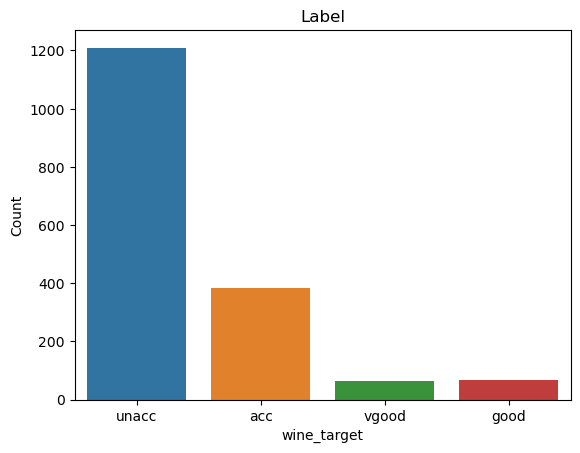

In [32]:
sns.countplot(data = df, x="class")
plt.xlabel("wine_target")
plt.ylabel("Count")
plt.title("Label")

In [58]:
df_data = df.drop(['class'], axis = 1)
df_labels = df['class']

In [59]:
X_train, X_test, y_train, y_test  = train_test_split(df_data, df_labels, test_size = 0.2, stratify= df_labels )

In [60]:
X_train

,buying,maint,doors,persons,lug_boot,safety
138,3,0,1,0,1,1
859,0,1,3,2,1,2
132,3,0,0,2,0,1
1631,1,1,0,1,2,0
1493,1,0,3,0,0,0
...,...,...,...,...,...,...
603,0,0,2,1,2,1
1246,2,1,2,0,1,2
710,0,2,2,0,0,0
199,3,0,3,1,2,2


In [61]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (1382, 6)
y_train.shape : (1382,)
X_test.shape: (346, 6)
y_test.shape: (346,)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [63]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS



--- SVM Classifier ---
0.930635838150289
[[ 68   1   7   1]
 [ 10   3   0   1]
 [  2   0 240   0]
 [  2   0   0  11]]


<AxesSubplot:>

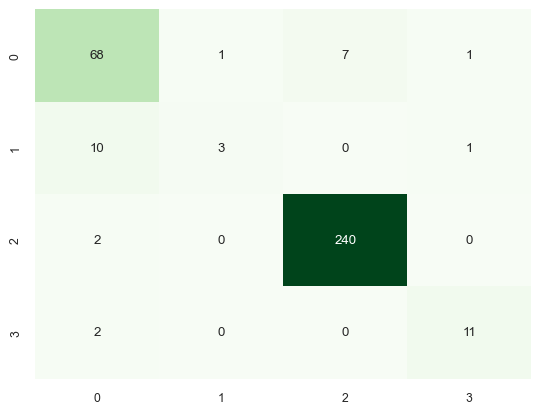

In [75]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

pred_svm = clf_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Logistic Regression Classifier ---
0.708092485549133
[[ 16   0  60   1]
 [  0   0  14   0]
 [ 16   0 226   0]
 [  5   0   5   3]]


<AxesSubplot:>

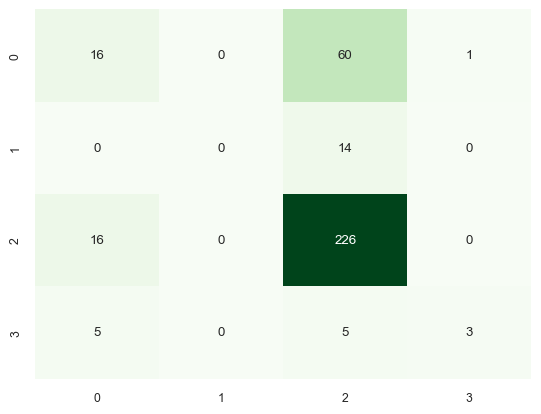

In [76]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

pred_lr = clf_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Radom Forest ---
0.9826589595375722
[[ 75   0   1   1]
 [  1  13   0   0]
 [  3   0 239   0]
 [  0   0   0  13]]


<AxesSubplot:>

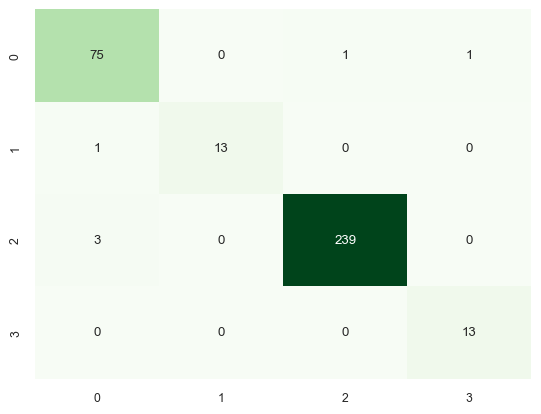

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred_rf))
print (confusion_matrix(y_test, pred_rf))

cm_rm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- DecisionTreeClassifier ---
0.9884393063583815
[[ 75   1   1   0]
 [  0  13   1   0]
 [  1   0 241   0]
 [  0   0   0  13]]


<AxesSubplot:>

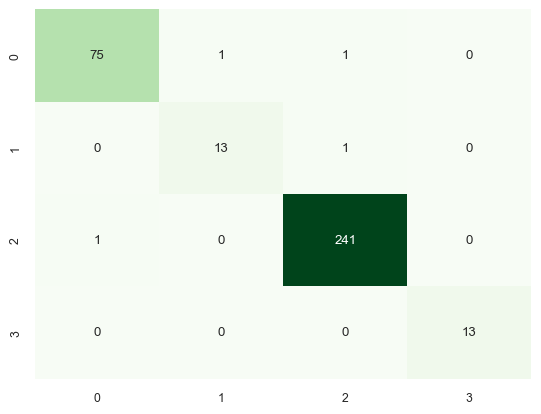

In [80]:
from sklearn.tree import DecisionTreeClassifier

print ("\n--- DecisionTreeClassifier ---")
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

cm_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")